In [1]:
import pandas as pd

df = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Test_set.xlsx")


In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [8]:
def stops(x):
    if x=="non-stop":
        return 0
    else:
        return x.split(" ")[0]

In [9]:
df["stops"]=df.Total_Stops.apply(stops)

In [10]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [11]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
stops              object
dtype: object

In [13]:
df["stops"]=df["stops"].astype(int)

In [14]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
stops               int32
dtype: object

In [15]:
df["journey_day"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day

In [16]:
df["journey_year"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.year

In [17]:
df["journey_month"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stops,journey_day,journey_year,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,24,2019,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,1,2019,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2,9,2019,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,12,2019,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,0,9,2019,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,0,27,2019,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,0,27,2019,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,0,1,2019,3


In [19]:
df.drop(["Date_of_Journey","Total_Stops"],inplace=True,axis=1)

In [20]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,stops,journey_day,journey_year,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,0,24,2019,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,2,1,2019,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,2,9,2019,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,1,12,2019,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,1,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,No info,4107,0,9,2019,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,No info,4145,0,27,2019,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,No info,7229,0,27,2019,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,No info,12648,0,1,2019,3


In [21]:
def duration(x):
    result=x.split(" ")
    result1=[]
    duration1=""
    for i in result:
        if "h" in i:
            res=i.replace("h","")
        else:
            res=i.replace("m","")
        result1.append(res)
    
    if len(result1)==1:
    
        duration1+=result1[0]
    
    else:
        duration1+=result1[0]+":"+result1[1]
        
        
    return duration1
    
        
    
    

In [22]:
df["duration"]=df.Duration.apply(duration)

In [23]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,stops,journey_day,journey_year,journey_month,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,0,24,2019,3,2:50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,2,1,2019,5,7:25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,2,9,2019,6,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,1,12,2019,5,5:25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,1,2019,3,4:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,No info,4107,0,9,2019,4,2:30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,No info,4145,0,27,2019,4,2:35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,No info,7229,0,27,2019,4,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,No info,12648,0,1,2019,3,2:40


In [24]:
def duration_hours(x):
    result=x.split(":")[0]
    return result

In [25]:
def duration_minutes(x):
    if ":" not in x:
        result=0
    else:
        result=x.split(":")[1]
    return result

In [26]:
df["duration_hours"]=df["duration"].apply(duration_hours)

In [27]:
df["duration_minutes"]=df["duration"].apply(duration_minutes)

In [28]:
df["duration"].astype(str)

0        2:50
1        7:25
2          19
3        5:25
4        4:45
         ... 
10678    2:30
10679    2:35
10680       3
10681    2:40
10682    8:20
Name: duration, Length: 10682, dtype: object

In [29]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,0,24,2019,3,2:50,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,2,1,2019,5,7:25,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,2,9,2019,6,19,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,1,12,2019,5,5:25,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,1,2019,3,4:45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,No info,4107,0,9,2019,4,2:30,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,No info,4145,0,27,2019,4,2:35,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,No info,7229,0,27,2019,4,3,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,No info,12648,0,1,2019,3,2:40,2,40


In [30]:
df['Depart_Time_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Depart_Time_Minutes'] = pd.to_datetime(df.Dep_Time).dt.minute

In [31]:
df['Arr_Time_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_Time_Minutes'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [32]:
df.drop(["Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [33]:
df

,Airline,Source,Destination,Route,Additional_Info,Price,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,0,24,2019,3,2:50,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2,1,2019,5,7:25,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2,9,2019,6,19,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,1,12,2019,5,5:25,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,1,2019,3,4:45,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,0,9,2019,4,2:30,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,0,27,2019,4,2:35,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,0,27,2019,4,3,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,0,1,2019,3,2:40,2,40,11,30,14,10


In [34]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [35]:
X=df.drop(["Price"],axis=1)
Y=df["Price"]

In [36]:
X

,Airline,Source,Destination,Route,Additional_Info,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,0,24,2019,3,2:50,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,2,1,2019,5,7:25,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,2,9,2019,6,19,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,1,12,2019,5,5:25,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,1,1,2019,3,4:45,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,0,9,2019,4,2:30,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,0,27,2019,4,2:35,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,0,27,2019,4,3,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,0,1,2019,3,2:40,2,40,11,30,14,10


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le1 = LabelEncoder()
X["Airline"]=le1.fit_transform(X["Airline"])

In [39]:
X["Source"]=le1.fit_transform(X["Source"])
X["Destination"]=le1.fit_transform(X["Destination"])
X["Additional_Info"]=le1.fit_transform(X["Additional_Info"])
X["Route"]=le1.fit_transform(X["Route"])

In [40]:
X

,Airline,Source,Destination,Route,Additional_Info,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,0,5,18,8,0,24,2019,3,2:50,2,50,22,20,1,10
1,1,3,0,84,8,2,1,2019,5,7:25,7,25,5,50,13,15
2,4,2,1,118,8,2,9,2019,6,19,19,0,9,25,4,25
3,3,3,0,91,8,1,12,2019,5,5:25,5,25,18,5,23,30
4,3,0,5,29,8,1,1,2019,3,4:45,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,8,0,9,2019,4,2:30,2,30,19,55,22,25
10679,1,3,0,64,8,0,27,2019,4,2:35,2,35,20,45,23,20
10680,4,0,2,18,8,0,27,2019,4,3,3,0,8,20,11,20
10681,10,0,5,18,8,0,1,2019,3,2:40,2,40,11,30,14,10


In [43]:
X.drop(["duration"],axis=1)


,Airline,Source,Destination,Route,Additional_Info,stops,journey_day,journey_year,journey_month,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,0,5,18,8,0,24,2019,3,2,50,22,20,1,10
1,1,3,0,84,8,2,1,2019,5,7,25,5,50,13,15
2,4,2,1,118,8,2,9,2019,6,19,0,9,25,4,25
3,3,3,0,91,8,1,12,2019,5,5,25,18,5,23,30
4,3,0,5,29,8,1,1,2019,3,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,8,0,9,2019,4,2,30,19,55,22,25
10679,1,3,0,64,8,0,27,2019,4,2,35,20,45,23,20
10680,4,0,2,18,8,0,27,2019,4,3,0,8,20,11,20
10681,10,0,5,18,8,0,1,2019,3,2,40,11,30,14,10


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

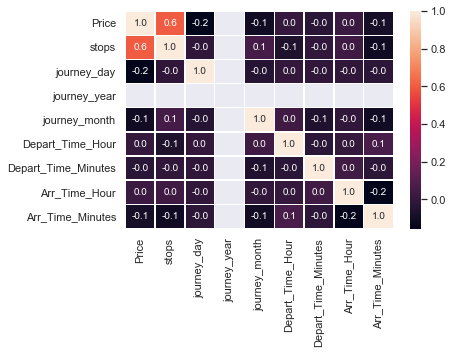

In [45]:
sns.heatmap(df.corr(),annot=True,linewidths=.5, fmt= '.1f')

In [46]:
df

,Airline,Source,Destination,Route,Additional_Info,Price,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,0,24,2019,3,2:50,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2,1,2019,5,7:25,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2,9,2019,6,19,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,1,12,2019,5,5:25,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,1,2019,3,4:45,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,0,9,2019,4,2:30,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,0,27,2019,4,2:35,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,0,27,2019,4,3,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,0,1,2019,3,2:40,2,40,11,30,14,10


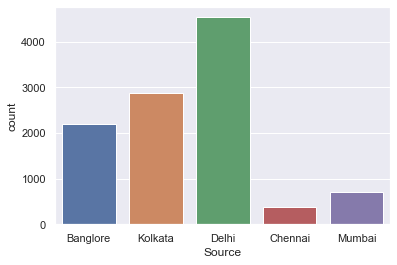

In [47]:
sns.countplot(df["Source"])

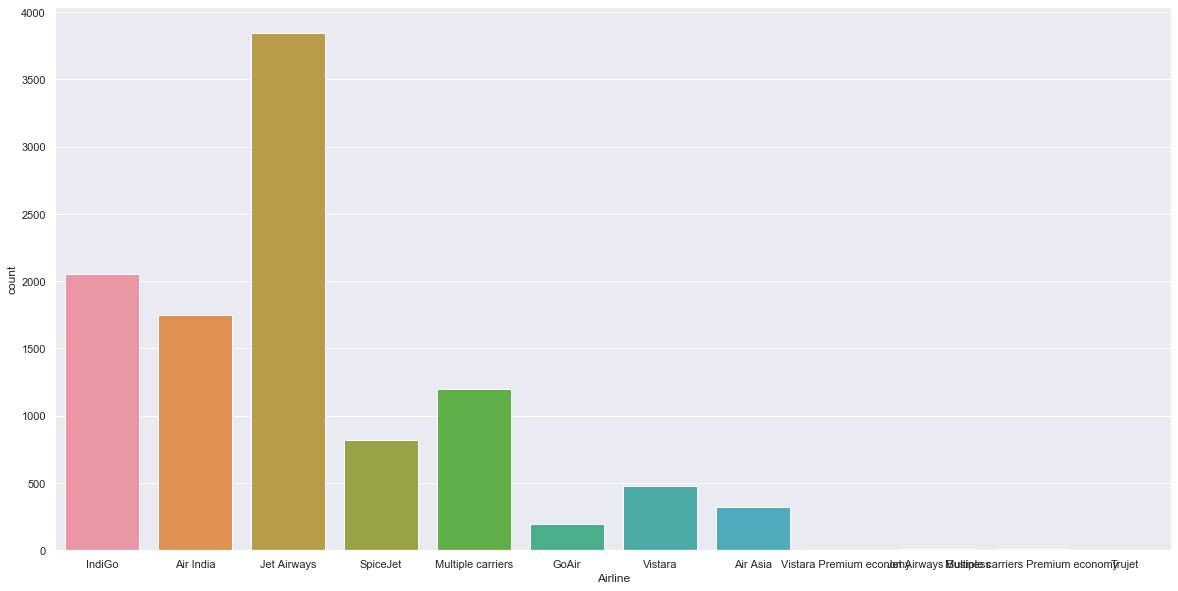

In [48]:
sns.countplot(df["Airline"])
fig = plt.gcf()
fig.set_size_inches(20,10)

In [51]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,0,24,2019,3,2:50,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2,1,2019,5,7:25,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2,9,2019,6,19,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,1,12,2019,5,5:25,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,1,2019,3,4:45,4,45,16,50,21,35


In [52]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [53]:
df1=df.copy()

In [55]:
df1.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [97]:
X.drop(["duration"],axis=1,inplace=True)

In [65]:
test_df = pd.read_excel("Test_set.xlsx")

In [68]:
test_df["stops"]=test_df["Total_Stops"].apply(stops)
    

In [69]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,1
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,1
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0


In [71]:
test_df.drop(["Total_Stops"],axis=1,inplace=True)

In [72]:
test_df["journey_day"]=pd.to_datetime(test_df.Date_of_Journey,format='%d/%m/%Y').dt.day
test_df["journey_year"]=pd.to_datetime(test_df.Date_of_Journey,format='%d/%m/%Y').dt.year
test_df["journey_month"]=pd.to_datetime(test_df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [73]:
test_df["duration"]=test_df.Duration.apply(duration)

In [77]:
test_df["duration_hours"]=test_df["duration"].apply(duration_hours)
test_df["duration_minutes"]=test_df["duration"].apply(duration_minutes)

In [78]:
test_df["duration"].astype(str)

0       10:55
1           4
2       23:45
3          13
4        2:50
        ...  
2666    23:55
2667     2:35
2668     6:35
2669    15:15
2670    14:20
Name: duration, Length: 2671, dtype: object

In [79]:
test_df['Depart_Time_Hour'] = pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['Depart_Time_Minutes'] = pd.to_datetime(test_df.Dep_Time).dt.minute
test_df['Arr_Time_Hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arr_Time_Minutes'] = pd.to_datetime(test_df.Arrival_Time).dt.minute

In [80]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,stops,journey_day,journey_year,journey_month,duration,duration_hours,duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,No info,1,6,2019,6,10:55,10,55,17,30,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,No info,1,12,2019,5,4,4,0,6,20,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,In-flight meal not included,1,21,2019,5,23:45,23,45,19,15,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,No info,1,21,2019,5,13,13,0,8,0,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,No info,0,24,2019,6,2:50,2,50,23,55,2,45


In [81]:
test_df.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [85]:
test_df.drop(["Duration"],axis=1,inplace=True)

In [98]:
test_df.drop(["duration"],axis=1,inplace=True)

In [83]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'stops',
       'journey_day', 'journey_year', 'journey_month', 'duration',
       'duration_hours', 'duration_minutes', 'Depart_Time_Hour',
       'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes'],
      dtype='object')

In [86]:
test_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'stops',
       'journey_day', 'journey_year', 'journey_month', 'duration',
       'duration_hours', 'duration_minutes', 'Depart_Time_Hour',
       'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes'],
      dtype='object')

In [87]:
le1 = LabelEncoder()
test_df["Airline"]=le1.fit_transform(test_df["Airline"])

In [88]:
test_df["Source"]=le1.fit_transform(test_df["Source"])
test_df["Destination"]=le1.fit_transform(test_df["Destination"])
test_df["Additional_Info"]=le1.fit_transform(test_df["Additional_Info"])
test_df["Route"]=le1.fit_transform(test_df["Route"])

In [94]:
X.dtypes

Airline                 int32
Source                  int32
Destination             int32
Route                   int32
Additional_Info         int32
stops                   int32
journey_day             int64
journey_year            int64
journey_month           int64
duration               object
duration_hours         object
duration_minutes       object
Depart_Time_Hour        int64
Depart_Time_Minutes     int64
Arr_Time_Hour           int64
Arr_Time_Minutes        int64
dtype: object

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state= 355)

In [102]:
model=RandomForestClassifier()

In [103]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
model.score(x_test,y_test)

0.5141965678627145

In [112]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,2),
    'min_samples_leaf' : range(1,10,3),
    'min_samples_split': range(2,10,3),
    'max_features' : ['auto','log2']
}

In [113]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=3,n_jobs =-1,verbose = 3)

In [114]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10, 3),
                         'min_samples_split': range(2, 10, 3),
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [115]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [116]:
modified_model=RandomForestClassifier(criterion='entropy',
 max_depth=8,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators=100
)

In [117]:
modified_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [121]:
modified_model.predict(test_df)

array([10262,  4226, 12898, ..., 10262, 10283, 10262], dtype=int64)